<h1 style="text-align: center;">Исследование сервиса проекта самокатов GoFast</h1>


## Описание проекта

**GoFast**- сервис проката самокатов, предоставляющий пользователям возможность совершать краткосрочные поездки по городу с помощью мобильного приложения.

Сервисом можно пользоваться с подпиской и без неё, что формирует разные модели поведения пользователей и различную структуру выручки.

**Условия подписки:**
- абонентская-плата - 199 рублей в месяц;
- стоимость одной минуты поездки - 6 рублей;
- бесплатное начало поездки.

**Без подписки:**
- стоимость одной мин- ы поездки - 8 рублей;
- стоимость на- ла поездки - 50 рублей.

Анализ данных пользователей позволяет оценить влияние подписки на поведение клиентов и экономические показатели сервиса.

---

## Цель исследования
-
Цель исследования — определить, как наличие подписки влияет на поведение пользователей сервиса GoFast и ключевые метрики поездок, а также оценить различия между пользователями с подпиской и без неё.

---

## Задачи исследования

В рамках проекта необходимо:
1. Провести первичное изучение структуры и качества данных.
2. Выполнить предобработку данных: обработать пропущенные значения, дубликаты и аномалии.
3. Проанализировать поведение пользователей и характеристики поездок.
4. Исследовать различия между пользователями с подпиской и без неё.
5. Проверить статистические гипотезы.
6. Сформулировать выводы и рекомендации на основе результатов анализа.

---

## Ход исследования

Исследование будет проводиться в несколько этапов:
- загрузка и первичное изучение данных;
- предобработка данных (обработка пропусков, дубликатов и аномалий);
- исследовательский анализ данных;
- визуализация ключевых метрик;
- проверка гипотез;
- формирование итоговых выводов.

---

## Описание данных

В распоряжении имеются данные о поездках пользователей сервиса GoFast, содержащие информацию о:
- пользователях;
- поездках;
- расстоянии, времени и стоимости поездок;
- наличии или отсутствии подписки.

---

## Проверяемые гипотезы

1. Пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.
2. Среднее расстояние поездок пользователей с подпиской не превышает 3,13 км.
3. Помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки.

---

## Ожидаемый результат

По итогам исследования будут сделаны выводы о различиях в поведении пользователей с подпиской и без неё, а также даны рекомендации для бизнеса на основе полученных результатов.




In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import binom
from math import factorial

In [63]:
sns.set_theme(style="darkgrid")

# Загрузка данных

In [64]:
try:
    user_name = pd.read_csv('C:/Users/Public/users_go.csv')
    rides = pd.read_csv('C:/Users/Public/rides_go.csv')
    subscriptions = pd.read_csv('C:/Users/Public/subscriptions_go.csv')
except:
    user_name = pd.read_csv('/datasets/users_go.csv')
    rides = pd.read_csv('/datasets/rides_go.csv')
    subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

### Предобработка данных

In [65]:
display(user_name.head())
user_name.info()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [66]:
display(rides.head())
rides.info()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [67]:
display(subscriptions.head())
subscriptions.info()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


Проверим наличие дубликатов:

In [68]:
user_name.duplicated().sum() 


31

In [69]:
user_name = user_name.drop_duplicates() #Удалим обнаруженные дубликаты
user_name.duplicated().sum() #проверим, что все дубликаты удалены

0

Приведем столбец date таблицы rides к формату datetime

In [70]:
rides['date'] = pd.to_datetime( rides['date'], format='%Y-%m-%d' )
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


Добавим столбец с номером месяца:

In [71]:
rides['month'] = pd.DatetimeIndex(rides['date']).month
rides['distance'] = rides['distance'].round()
rides['duration'] = rides['duration'].round()
rides.head()

,user_id,distance,duration,date,month
0,1,4410.0,26.0,2021-01-01,1
1,1,2618.0,16.0,2021-01-18,1
2,1,754.0,6.0,2021-04-20,4
3,1,2695.0,19.0,2021-08-11,8
4,1,4029.0,26.0,2021-08-28,8


Проверим за какой период предоставленны данные:

In [72]:
display(rides['date'].min())
display(rides['date'].max())

Timestamp('2021-01-01 00:00:00')

Timestamp('2021-12-30 00:00:00')

Проверим, если данные duration <= 0

In [73]:
rides[rides['duration'] >= 0]

,user_id,distance,duration,date,month
0,1,4410.0,26.0,2021-01-01,1
1,1,2618.0,16.0,2021-01-18,1
2,1,754.0,6.0,2021-04-20,4
3,1,2695.0,19.0,2021-08-11,8
4,1,4029.0,26.0,2021-08-28,8
...,...,...,...,...,...
18063,1534,3781.0,20.0,2021-11-04,11
18064,1534,2840.0,21.0,2021-11-16,11
18065,1534,3826.0,18.0,2021-11-18,11
18066,1534,2902.0,17.0,2021-11-27,11


In [74]:
rides = rides[rides['duration'] > 0] #уберем данные с длительностью 0

In [75]:
rides['speed'] = (rides['distance'] / 1000) / (rides['duration'] / 60)
display(rides['speed'].min())
display(rides['speed'].max())

0.006

26.08

In [76]:
rides[rides['speed'] < 1]

,user_id,distance,duration,date,month,speed
6611,707,29.0,14.0,2021-09-12,9,0.124286
6691,712,24.0,2.0,2021-11-22,11,0.720000
6699,713,196.0,13.0,2021-08-02,8,0.904615
6794,720,193.0,13.0,2021-03-01,3,0.890769
6816,721,63.0,7.0,2021-09-25,9,0.540000
...,...,...,...,...,...,...
17760,1514,76.0,5.0,2021-01-26,1,0.912000
17808,1517,181.0,11.0,2021-01-10,1,0.987273
17856,1521,106.0,9.0,2021-04-04,4,0.706667
17881,1522,218.0,14.0,2021-09-18,9,0.934286


In [77]:
rides = rides[rides['speed'] > 1] #уберём данные со скоростью < 1 m.к. выгледят как погрешность

In [78]:
rides['speed'].describe()

count    17859.000000
mean        10.680754
std          3.903584
min          1.004000
25%          8.157624
50%         10.251818
75%         12.914429
max         26.080000
Name: speed, dtype: float64

In [79]:
rides.head()


,user_id,distance,duration,date,month,speed
0,1,4410.0,26.0,2021-01-01,1,10.176923
1,1,2618.0,16.0,2021-01-18,1,9.817500
2,1,754.0,6.0,2021-04-20,4,7.540000
3,1,2695.0,19.0,2021-08-11,8,8.510526
4,1,4029.0,26.0,2021-08-28,8,9.297692


**Данные по поездкам пользователей за 2021 год предоставлены в достаточном объеме для исследования. Качество данных высокое: пропусков нет, дубликатов немного. Средняя скорость поездок составляет около 10,6 км/ч. Значения ниже 1 км/ч были удалены как аномальные — вероятно, это стоянки самокатов или шум GPS. В целом, данные позволяют провести полноценный анализ и проверить выдвинутые гипотезы.**

# Исследовательский анализ данных

Рассмотрим общую структуру данных, их объём и основные характеристики.

Изучим:
- количество пользователей и поез по городамдок;
- распределение пользователей по типу подписки;
- базовые статистики по длительности, расстоянию и стоимости поездок.

Это позволит получить общее представление о данных и определить направления дальнейшего анализа.

Посмотрим уникальные значения городов:

<Axes: title={'center': 'Соотношение пользователей по городам'}, xlabel='Город', ylabel='Количество пользователей'>

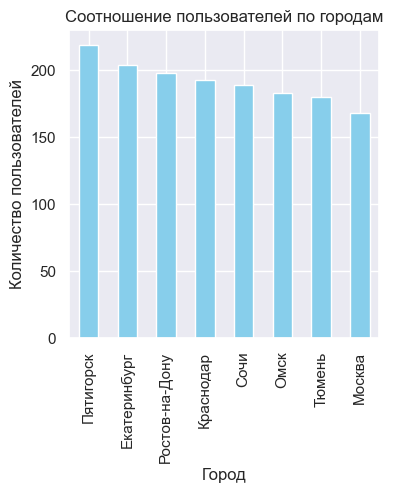

In [80]:
user_name['city'].value_counts().sort_values() 
user_name['city'].value_counts().plot( kind='bar', color='skyblue', figsize = (4,4),
    title = 'Соотношение пользователей по городам',
    xlabel = 'Город',
    ylabel = 'Количество пользователей'
)

**Больше всего приложением с самокатами пользуются в Пятигорски и Екатеринбурге, меньше всего в Москве**

Оценим соотношение пользовтелей с подпиской и без:

<Axes: title={'center': 'Соотношение пользователей с и без подписки'}, ylabel='percent'>

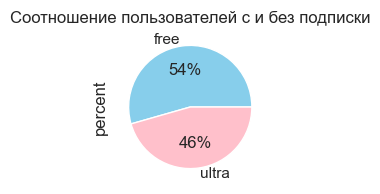

In [81]:
type_user = user_name.groupby('subscription_type').agg({'user_id': 'count'})
type_user['percent'] = round(type_user['user_id'] / type_user['user_id'].sum() * 100, 2)
type_user
type_user['percent'].plot(kind='pie', figsize = (3,2), autopct = '%1.0f%%',
    colors = ['skyblue', 'pink'],
    title = 'Соотношение пользователей с и без подписки',
    )

**Анализ показывает, что в данных присутствуют обе категории пользователей, что позволяет корректно сравнивать их поведение и ключевые метрики поездок. Существенного дисбаланса между группами не наблюдается, пользовательно без подписки больше на 8%, поэтому результаты дальнейшего анализа можно считать репрезентативными.
**

Посмотрим возвраст пользователей приложения:

C:\anacondas\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

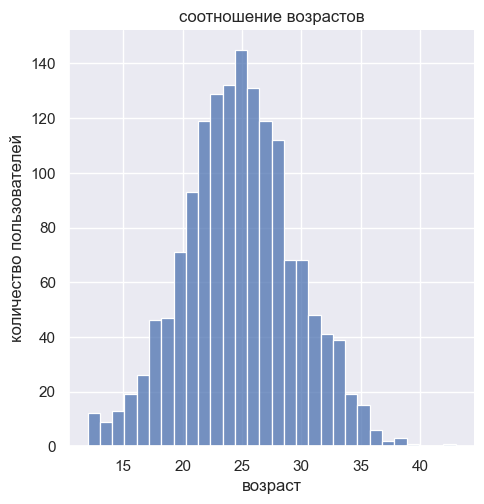

In [82]:
display(sns.displot(data=user_name["age"], bins=30).set(title='соотношение возрастов', xlabel='возраст', ylabel='количество пользователей'))
user_name['age'].describe()

**В основном пользователи приложения возраста от 22 до 28 лет.**

Проанализируем ключевые показатели поездок:
- длительность поездок;
- расстояние поездок;
- выручу.


C:\anacondas\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


count    17859.000000
mean      3078.747466
std       1086.769074
min         41.000000
25%       2551.000000
50%       3135.000000
75%       3768.000000
max       7066.000000
Name: distance, dtype: float64

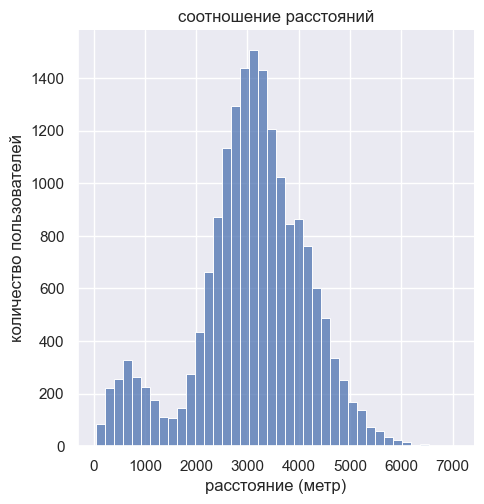

In [83]:
sns.displot(data=rides['distance'], bins=40).set(title='соотношение расстояний', xlabel='расстояние (метр)', ylabel='количество пользователей')
rides['distance'].describe()

**Анализ распределения показывает, что большинство поездок имеют относительно небольшое расстояние, что подтверждает использование сервиса преимущественно для краткосрочных городских перемещений.  В основном пользователи преодалевают дистанцию от 2,5 до 3,7км**

Посмотрим длительность поездок:

C:\anacondas\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


count    17859.000000
mean        17.947141
std          5.962392
min          2.000000
25%         14.000000
50%         18.000000
75%         22.000000
max         41.000000
Name: duration, dtype: float64

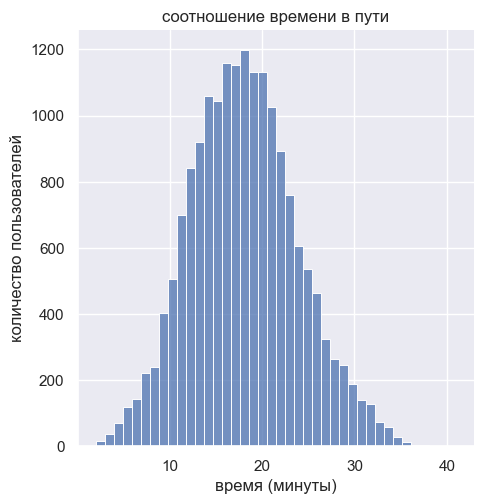

In [84]:
sns.displot(data=rides['duration'], bins=40).set(title='соотношение времени в пути', xlabel='время (минуты)', ylabel='количество пользователей')
rides['duration'].describe()

****Анализ распределения показывает, что большинство поездок имеют небольшую продолжительность. Это подтверждает, что сервис в основном используется для краткосрочных перемещений по городу, а не для длительных поездок.**
В основном поездка на самокате длится от от 14 до 22 минут.**

# Объединение данных

In [85]:
rides_merge = user_name.merge(rides, on='user_id', how='left') #объединим данные пользователей и их поездок по столбцу user_id
rides_merge = rides_merge.merge(subscriptions, on='subscription_type', how='left') #объединим данные c информацией о подпске по столбцу subscription_fee
rides_merge.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,speed,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4410.0,26.0,2021-01-01,1,10.176923,6,0,199
1,1,Кира,22,Тюмень,ultra,2618.0,16.0,2021-01-18,1,9.817500,6,0,199
2,1,Кира,22,Тюмень,ultra,754.0,6.0,2021-04-20,4,7.540000,6,0,199
3,1,Кира,22,Тюмень,ultra,2695.0,19.0,2021-08-11,8,8.510526,6,0,199
4,1,Кира,22,Тюмень,ultra,4029.0,26.0,2021-08-28,8,9.297692,6,0,199


In [86]:
display('размер датасета rides:', rides.shape)
display('размер датасета rides_merge:', rides_merge.shape) #проверили, что после объединенеия таблиц не были утеряны данные

'размер датасета rides:'

(17859, 6)

'размер датасета rides_merge:'

(17859, 13)

In [87]:
rides_merge.isna().sum() #проверили, что после объединения таблиц отсутствуют пропущенные значения

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
distance             0
duration             0
date                 0
month                0
speed                0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Создадим две таблицы с пользователями с подпиской и без:

In [88]:
rides_free = rides_merge.query('subscription_type == "free"').reset_index(drop=True)
rides_free.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,speed,minute_price,start_ride_price,subscription_fee
0,700,Айдар,22,Омск,free,2516.0,15.0,2021-01-02,1,10.064000,8,50,0
1,700,Айдар,22,Омск,free,847.0,16.0,2021-02-01,2,3.176250,8,50,0
2,700,Айдар,22,Омск,free,4004.0,20.0,2021-02-04,2,12.012000,8,50,0
3,700,Айдар,22,Омск,free,1206.0,10.0,2021-02-10,2,7.236000,8,50,0
4,700,Айдар,22,Омск,free,3047.0,17.0,2021-02-14,2,10.754118,8,50,0


In [89]:
rides_ultra = rides_merge.query('subscription_type == "ultra"').reset_index(drop=True)
rides_ultra.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,speed,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4410.0,26.0,2021-01-01,1,10.176923,6,0,199
1,1,Кира,22,Тюмень,ultra,2618.0,16.0,2021-01-18,1,9.817500,6,0,199
2,1,Кира,22,Тюмень,ultra,754.0,6.0,2021-04-20,4,7.540000,6,0,199
3,1,Кира,22,Тюмень,ultra,2695.0,19.0,2021-08-11,8,8.510526,6,0,199
4,1,Кира,22,Тюмень,ultra,4029.0,26.0,2021-08-28,8,9.297692,6,0,199


Сравним расстояние поездок пользователей с подпиской и без неё:

C:\anacondas\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anacondas\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


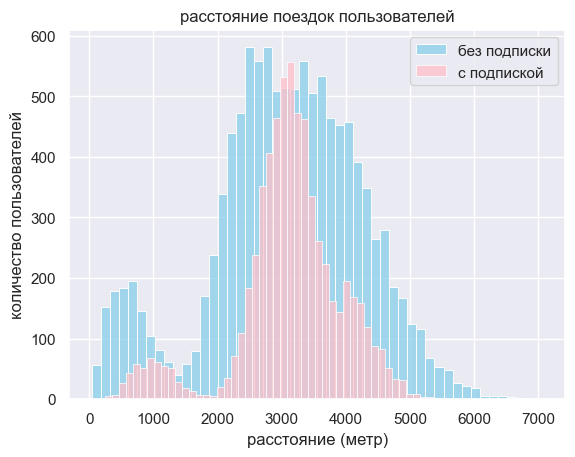

'rides_free:'

count    11359.000000
mean      3057.748834
std       1206.232112
min         41.000000
25%       2382.000000
50%       3116.000000
75%       3892.000000
max       7066.000000
Name: distance, dtype: float64

'rides_ultra:'

count    6500.000000
mean     3115.443385
std       836.898137
min       244.000000
25%      2785.000000
50%      3149.000000
75%      3561.000000
max      5700.000000
Name: distance, dtype: float64

In [90]:
sns.set_theme(style="darkgrid")

sns.histplot(data=rides_free, x='distance', bins=50, color='skyblue', label='без подписки').set(title='расстояние поездок пользователей',
                                                                                                ylabel='количество пользователей',
                                                                                               xlabel='расстояние (метр)')
sns.histplot(data=rides_ultra, x='distance', bins=50, color='pink', label='с подпиской')

plt.legend() 
plt.show()

display('rides_free:', rides_free['distance'].describe())
display('rides_ultra:', rides_ultra['distance'].describe())


**Средняя дистанция поездок пользователей с подпиской сопоставима со средней дистанцией поездок пользователей без подписки. Существенных различий в расстоянии поездок между группами пользователей не выявлено.**

C:\anacondas\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\anacondas\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


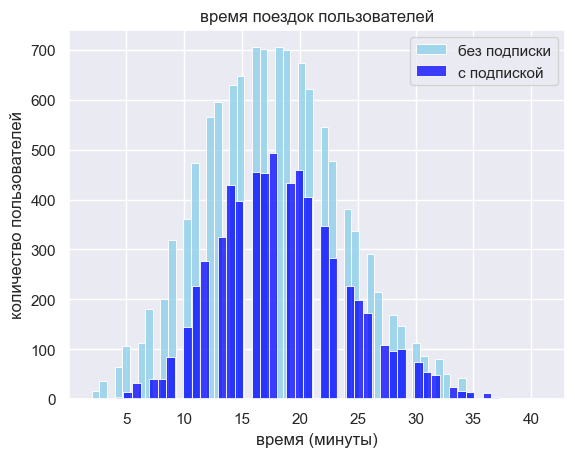

'rides_free:'

count    11359.000000
mean        17.602606
std          6.146679
min          2.000000
25%         13.000000
50%         17.000000
75%         22.000000
max         35.000000
Name: duration, dtype: float64

'rides_ultra:'

count    6500.000000
mean       18.549231
std         5.575445
min         4.000000
25%        15.000000
50%        18.000000
75%        22.000000
max        41.000000
Name: duration, dtype: float64

In [91]:
sns.set_theme(style="darkgrid")

sns.histplot(data=rides_free, x='duration', bins=50, color='skyblue', label='без подписки').set(title='время поездок пользователей',
                                                                                                ylabel='количество пользователей',
                                                                                               xlabel='время (минуты)')
sns.histplot(data=rides_ultra, x='duration', bins=50, color='blue', label='с подпиской')

plt.legend() 
plt.show()

display('rides_free:', rides_free['duration'].describe())
display('rides_ultra:', rides_ultra['duration'].describe())

# Подсчёт выручки

Создадим сводную таблицу с суммарной дистанции, затраченного времени, кол-вом поездок для каждого пользовотеля:

In [92]:
total_rides = rides_merge.groupby(['user_id', 'name','month'])\
.agg({'distance':'sum','duration':['sum','count'], 'subscription_fee': 'first', 'minute_price': 'first','start_ride_price': 'first', 'subscription_type': 'first'})
total_rides['duration'] = np.ceil(total_rides['duration'])
total_rides['distance'] = round(total_rides['distance']) 
total_rides.columns = ['total_distance', 'total_duration', 'rides_count', 'subscription_fee', 'minute_price', 'start_ride_price', 'subscription_type']
total_rides.head(10)

total_distance  total_duration  rides_count  \
user_id name      month                                                
1       Кира      1              7028.0            42.0          2.0   
                  4               754.0             6.0          1.0   
                  8              6724.0            45.0          2.0   
                  10             5810.0            32.0          2.0   
                  11             7004.0            53.0          3.0   
                  12             6752.0            28.0          2.0   
2       Станислав 3             10188.0            61.0          3.0   
                  4              6165.0            39.0          2.0   
                  6              3255.0            14.0          1.0   
                  7              6781.0            46.0          2.0   

                         subscription_fee  minute_price  start_ride_price  \
user_id name      month                                                     
1       Кира      1                   199             6                 0   
                  4                   199             6                 0   
                  8                   199             6                 0   
                  10                  199             6                 0   
                  11                  199             6                 0   
                  12                  199             6                 0   
2       Станислав 3                   199             6                 0   
                  4                   199             6                 0   
                  6                   199             6                 0   
                  7                   199             6                 0   

                        subscription_type  
user_id name      month                    
1       Кира      1                 ultra  
                  4                 ultra  
                  8                 ultra  
                  10                ultra  
                  11                ultra  
                  12                ultra  
2       Станислав 3                 ultra  
                  4                 ultra  
                  6                 ultra  
                  7                 ultra

Добавим новый столбец с помесячной выручкой для каждого пользовотеля:

In [93]:
total_rides['profit'] = (total_rides['start_ride_price'] * total_rides['rides_count']) + \
(total_rides['minute_price'] * total_rides['total_duration']) + total_rides['subscription_fee']
total_rides.head()

total_distance  total_duration  rides_count  \
user_id name month                                                
1       Кира 1              7028.0            42.0          2.0   
             4               754.0             6.0          1.0   
             8              6724.0            45.0          2.0   
             10             5810.0            32.0          2.0   
             11             7004.0            53.0          3.0   

                    subscription_fee  minute_price  start_ride_price  \
user_id name month                                                     
1       Кира 1                   199             6                 0   
             4                   199             6                 0   
             8                   199             6                 0   
             10                  199             6                 0   
             11                  199             6                 0   

                   subscription_type  profit  
user_id name month                            
1       Кира 1                 ultra   451.0  
             4                 ultra   235.0  
             8                 ultra   469.0  
             10                ultra   391.0  
             11                ultra   517.0

Рассмотрим среднюю выручку по пользователям по подписке и без подписки за год:

In [95]:
total_rides = total_rides.reset_index()


user_profit = (
    total_rides
    .groupby(['user_id', 'subscription_type'], as_index=False)['profit']
    .sum()
)

avg_user_profit = (
    user_profit
    .groupby('subscription_type')['profit']
    .mean().round()
)
avg_user_profit

subscription_type
free     2596.0
ultra    2325.0
Name: profit, dtype: float64

**По средним значениям годовой выручки пользователи без подписки приносят больше дохода, чем пользователи с подпиской. Посмотрим среднюю помесячную выручку**

In [105]:

user_month_profit = (
    total_rides
    .groupby(['user_id', 'month', 'subscription_type'], as_index=False)['profit']
    .sum()
)

user_month_profit.groupby('subscription_type')['profit'].mean().round()


subscription_type
free     322.0
ultra    359.0
Name: profit, dtype: float64

**При анализе помесячной выручки было выявлено, что в расчёте на активный месяц пользователи с подпиской приносят больше дохода, чем пользователи без подписки.
Таким образом, различие в результатах объясняется разным уровнем агрегации данных: подписка повышает доходность пользователя в краткосрочном периоде, но не обеспечивает более высокую годовую выручку.**

# Проверка гипотез

Гипотеза: Пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.

**Нулевая гипотеза:** Пользователи с подпиской тратят столько же времени, сколько тратят на поездку пользователи без подписки

**Альтернатвная гипотеза:** Пользователи с подпиской тратят времени больше, чем пользователи с подпиской

In [99]:
alpha = 0.05 # уровень статистической значимости

results = st.ttest_ind(rides_ultra['duration'], rides_free['duration'], alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 7.832464963075786e-25
Отвергаем нулевую гипотезу


**На уровне значимости α = 0.05 нулевая гипотеза была отвергнута. Пользователи с подпиской действительно проводят больше времени в поездках.**

Гипотеза: Среднее расстояние поездок пользователей с подпиской не превышает 3,13 км.

**Нулевая гипотеза:** среднее расстояние, которое проезжают пользователи с подпиской за одну поездку равно 3130 метров

**Альтернатвная гипотеза:** Пользователи с подпиской проезжают больше 3130 метров

In [100]:
value = 3130

alpha = 0.05 # уровень статистической значимости

results = st.ttest_1samp(rides_ultra['distance'], value, alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 0.9195649894697724
Не отвергаем нулевую гипотезу


**На уровне значимости α = 0.05 нулевая гипотеза не была отвергнута. Средняя дистанция поездок пользователей с подпиской не превышает заданное значение.**

Гипотеза: Помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки.

**Нулевая гипотеза:** Помесячная выручка от пользователей с подпиской не превышает помесячную выручку от пользователей без подписки

**Альтернатвная гипотеза:** Помесячная выручка от пользователей с подпиской выше помесячной выручки от пользователей без подписки

In [103]:
alpha = 0.05 # уровень статистической значимости

ultra = user_month_profit.query('subscription_type == "ultra"')['profit']
free = user_month_profit.query('subscription_type == "free"')['profit']

results = st.ttest_ind(ultra,free, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 2.2330037006527915e-37
Отвергаем нулевую гипотезу


**На уровне значимости α = 0.05 нулевая гипотеза была отвергнута. Пользователи с подпиской приносят более высокую помесячную выручку.**

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

**Для проверки этой гипотезы нужно использовать двухвыборочный t-тест для зависимых выборок**

# Вывод

Проанализированы данные пользователей приложения аренды самокатов **GoFast**.  

Данные полные: пропусков нет, дубликаты встречаются редко.  

**Подготовка данныхудалены дубликаты и аномальные значенияниякаттаблицы объеденены в однуицы одну,  
- сгруппированы поездки по пользователям (суммарное расстояние, время, выручка).  

**Основные наблюдения:**
- Средний возраст пользователей — 25 лет (большинство от 22 до 28 лет)  
- Среднее расстояние поездки — 3 км  
- Среднее время поездки — 18 минут  
- Наибольшая активность — в Пятигорске, наименьшая — в Москве  

**Проверка гипотез:**
1. Пользователи с подпиской тратят больше времени на поездки  
2. Среднее расстояние поездок пользователей с подпиской не превышает 3,13 км  
3. Помесячная выручка от пользователей с подпиской выше, чем у пользователей без по
В ходе анализа были изучены данные о поездках пользователей сервиса аренды самокатов с подпиской и без неё, а также проверены ключевые бизнес-гипотезы.

Пользователи с подпиской в среднем проводят больше времени в поездках, что указывает на более высокую активность по сравнению с пользователями без подписки. Кроме того, анализ показал, что средняя помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки.

В то же время средняя годовая выручка на одного пользователя без подписки оказалась выше, чем у пользователей с подпиской. Это может быть связано с тем, что пользователи без подписки в среднем дольше остаются активными в сервисе и совершают поездки в течение большего количества месяцев.

Таким образом, подписка повышает краткосрочную ценность пользователя и увеличивает выручку в расчёте на активный месяц, однако не гарантирует более высокую годовую выручку на одного клиента. Для увеличения общей выручки компании может быть целесообразно дополнительно проанализировать удержание подписчиков и продолжительность их использования сервиса. увеличивает выручку.
